In [0]:
!pip install -q keras
!pip install -q eli5

In [0]:
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=13lEn4rTnzhGaRa0XV7tD9bNdHHWOwSvr'

In [4]:
fluff, id = link.split('=')

print (id) # Verify that you have everything after '='

13lEn4rTnzhGaRa0XV7tD9bNdHHWOwSvr


# Import necessary packages like Pandas,numpy.....

In [1]:
#Import necessary packages 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
#from keras.models import Sequential
from sklearn.utils import resample
import matplotlib.pyplot as plt
#from keras.layers import Dense, Dropout, Flatten
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np
#import eli5 #for feature importance
#from eli5.sklearn import PermutationImportance
import random
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD
#from keras.constraints import maxnorm

from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('paylaterdy.csv')  
data = pd.read_csv('paylaterdy.csv')

# Dataset is now stored in a Pandas Dataframe

In [2]:
#DECLARE CSV FILE
dir_data = 'paylaterdy.csv'

In [3]:
#READ DATA FILE
data = pd.read_csv(dir_data, low_memory = False)

# Data Preprocessing

In [4]:
#show data(first two rows)
data.head(2)

,clientId,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,clientTimeAtEmployer,...,interestRate,loanTerm,max_amount_taken,max_tenor_taken,repaidDate,dueDate.1,settleDays,firstPaymentRatio,firstPaymentDefault,loanDefault
0,623648987,100000.0,True,36,MALE,Single,education,Rented,LAGOS,27,...,5.0,180,0,1,2018-07-25 14:57:24 UTC,2018-07-24 00:00:00 UTC,1,0.0,0,0
1,304054278,70000.0,False,55,MALE,Married,business,Employer Provided,EDO,36+,...,7.5,180,0,1,2018-04-14 04:02:50 UTC,2018-03-10 00:00:00 UTC,35,0.0,1,1


In [5]:
#datatypes of data variable
data.dtypes

clientId                       int64
clientIncome                 float64
incomeVerified                object
clientAge                      int64
clientGender                  object
clientMaritalStatus           object
clientLoanPurpose             object
clientResidentialStauts       object
clientState                   object
clientTimeAtEmployer          object
clientNumberPhoneContacts    float64
clientAvgCallsPerDay         float64
loanId                        object
loanType                      object
loanNumber                     int64
applicationDate               object
approvalDate                  object
declinedDate                  object
disbursementDate              object
payout_status                 object
dueDate                       object
paidAt                        object
loanAmount                     int64
interestRate                 float64
loanTerm                       int64
max_amount_taken               int64
max_tenor_taken                int64
r

In [6]:
#missing values of data variable
data.isnull().sum()

clientId                          0
clientIncome                      0
incomeVerified                  103
clientAge                         0
clientGender                      0
clientMaritalStatus               6
clientLoanPurpose                 0
clientResidentialStauts        1136
clientState                       1
clientTimeAtEmployer           4194
clientNumberPhoneContacts      2708
clientAvgCallsPerDay           2687
loanId                            0
loanType                          0
loanNumber                        0
applicationDate                   0
approvalDate                      0
declinedDate                 159589
disbursementDate                  0
payout_status                     0
dueDate                           0
paidAt                        29800
loanAmount                        0
interestRate                      0
loanTerm                          0
max_amount_taken                  0
max_tenor_taken                   0
repaidDate                  

Feature Engineering from Date Variables

In [7]:
#date variables to datetime
data['applicationDate'] = pd.to_datetime(data['applicationDate'])
data['approvalDate'] = pd.to_datetime(data['approvalDate'])
data['disbursementDate'] = pd.to_datetime(data['disbursementDate'])
data['repaidDate'] = pd.to_datetime(data['repaidDate'])
data['dueDate.1'] = pd.to_datetime(data['dueDate.1'])

In [8]:
#function to engineer features from date variable
def prepare_time_features(df):
    df['month'] = df.applicationDate.dt.month
    df["year"] = df.applicationDate.dt.year
    df["day_of_month"] = df.applicationDate.dt.day
    
    return df


def prepare_time_featuressss(df):
    df['monthsss'] = df.repaidDate.dt.month
    df["yearsss"] = df.repaidDate.dt.year
    df["day_of_monthsss"] = df.repaidDate.dt.day
    
    return df

In [9]:
#objectify function
data = prepare_time_features(data)
data = prepare_time_featuressss(data)

In [10]:
#show data(first two rows)
data.head(2)

,clientId,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,clientTimeAtEmployer,...,settleDays,firstPaymentRatio,firstPaymentDefault,loanDefault,month,year,day_of_month,monthsss,yearsss,day_of_monthsss
0,623648987,100000.0,True,36,MALE,Single,education,Rented,LAGOS,27,...,1,0.0,0,0,6,2018,24,7.0,2018.0,25.0
1,304054278,70000.0,False,55,MALE,Married,business,Employer Provided,EDO,36+,...,35,0.0,1,1,8,2018,2,4.0,2018.0,14.0


<function matplotlib.pyplot.show(*args, **kw)>

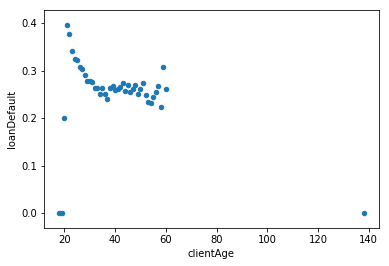

In [11]:
#visualize the correlation between clientAge and loanDefault using a scatter plot
data[['clientAge', 'loanDefault']].groupby(['clientAge'],as_index=False).mean().plot.scatter('clientAge','loanDefault')
plt.show

In [12]:
#unique values in clientAge column
data.clientAge.unique()

array([ 36,  55,  38,  39,  51,  37,  49,  23,  30,  34,  32,  48,  25,
        27,  29,  33,  52,  35,  26,  31,  40,  45,  46,  43,  42,  47,
        41,  28,  22,  50,  53,  24,  44,  54,  21,  60,  58,  59,  57,
        56,  19,  20, 138,  18], dtype=int64)

It is interesting to find a clientAge of 138!!!! This will definitely mean an outlier

In [13]:
#drop the outlier row
data = data[data["clientAge"] < 138]

In [14]:
data = data.reset_index()

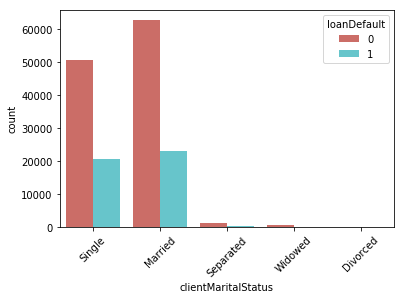

In [15]:
#check the distribution of clientMaritalStatus against loanDefault 
sns.countplot(x='clientMaritalStatus', data=data, palette='hls', hue='loanDefault')
plt.xticks(rotation=45)
plt.show( )

Interesting to find more married people getting more loans from PAYLATER and also having higher default rate

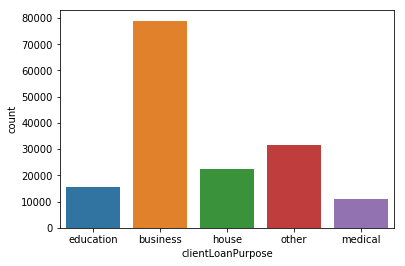

In [16]:
#plot distribution of clientLoanPurpose
sns.countplot(x='clientLoanPurpose', data=data)

WHAO!!!! It is not surprising to see business inclined people getting more loan.
People really take loans in Nigeria for education!!! Nice seeing this.

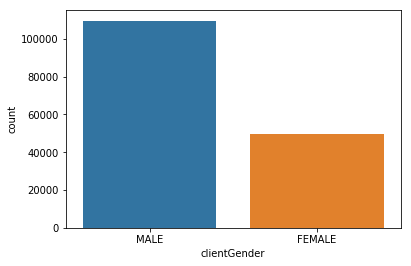

In [17]:
#plot distribution of clientGender
sns.countplot(x='clientGender', data=data)

Interesting to see males taking most loans!!!

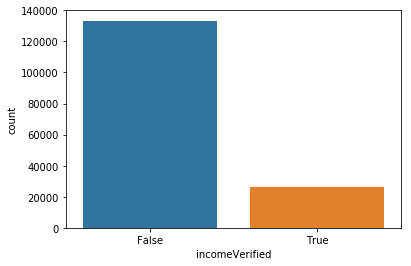

In [18]:
sns.countplot(x='incomeVerified', data=data)

A lot more incomeVerified are False

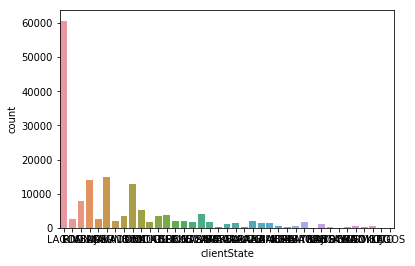

In [19]:
#plot distribution of clientState
sns.countplot(x='clientState', data=data)

Lagosians are really taking loans as they have the most loans

<function matplotlib.pyplot.show(*args, **kw)>

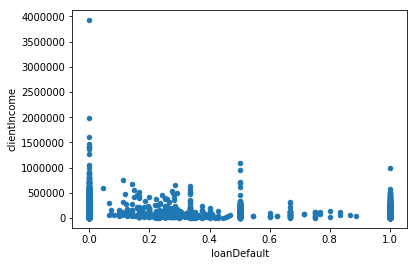

In [20]:
#visualize the correlation between clientIncome and loanDefault using a scatter plot
data[['loanDefault', 'clientIncome']].groupby(['clientIncome'],as_index=False).mean().plot.scatter('loanDefault','clientIncome')
plt.show

correlation plot to check variable correlation with other variables

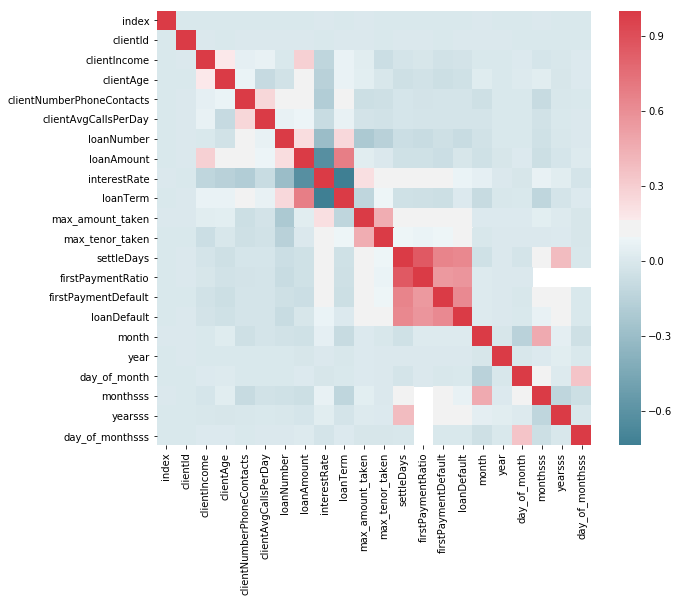

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

drop columns/variables that are redundant,high variability,highly correlated with other variables

In [22]:
data.drop(['paidAt','dueDate','dueDate.1','clientId','loanId','loanType','declinedDate','payout_status',
           'repaidDate','disbursementDate','approvalDate','applicationDate','clientTimeAtEmployer','firstPaymentRatio'], axis=1, inplace=True) 

In [23]:
data.describe(include=['object'])

,incomeVerified,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState
count,159492,159595,159589,159595,158459,159594
unique,2,2,5,5,5,39
top,False,MALE,Married,business,Rented,LAGOS
freq,133286,109665,85491,78975,100533,60666


In [24]:
data.dtypes

index                          int64
clientIncome                 float64
incomeVerified                object
clientAge                      int64
clientGender                  object
clientMaritalStatus           object
clientLoanPurpose             object
clientResidentialStauts       object
clientState                   object
clientNumberPhoneContacts    float64
clientAvgCallsPerDay         float64
loanNumber                     int64
loanAmount                     int64
interestRate                 float64
loanTerm                       int64
max_amount_taken               int64
max_tenor_taken                int64
settleDays                     int64
firstPaymentDefault            int64
loanDefault                    int64
month                          int64
year                           int64
day_of_month                   int64
monthsss                     float64
yearsss                      float64
day_of_monthsss              float64
dtype: object

In [25]:
#check value count of target variable
data.loanDefault.value_counts()

0    115303
1     44292
Name: loanDefault, dtype: int64

In [26]:
#sum of unique values in each columns
data.nunique()

index                        159595
clientIncome                   9362
incomeVerified                    2
clientAge                        43
clientGender                      2
clientMaritalStatus               5
clientLoanPurpose                 5
clientResidentialStauts           5
clientState                      39
clientNumberPhoneContacts      7377
clientAvgCallsPerDay         100306
loanNumber                       32
loanAmount                      483
interestRate                    133
loanTerm                          3
max_amount_taken                  2
max_tenor_taken                   2
settleDays                      419
firstPaymentDefault               2
loanDefault                       2
month                            12
year                              2
day_of_month                     30
monthsss                         12
yearsss                           3
day_of_monthsss                  31
dtype: int64

get dummy of object variables

In [27]:
data = pd.get_dummies(data, columns = ['incomeVerified','clientGender','clientMaritalStatus',
                                       'clientLoanPurpose','clientResidentialStauts','clientState'])

fill nan with -999

In [28]:
data = data.fillna(-999)

In [29]:
#show head of data
data.head(2)

,index,clientIncome,clientAge,clientNumberPhoneContacts,clientAvgCallsPerDay,loanNumber,loanAmount,interestRate,loanTerm,max_amount_taken,...,clientState_OJO,clientState_ONDO,clientState_OSUN,clientState_OYO,clientState_PLATEAU,clientState_RIVERS,clientState_SOKOTO,clientState_TARABA,clientState_YOBE,clientState_ZAMFARA
0,0,100000.0,36,-999.0,-999.000000,4,117000,5.0,180,0,...,0,0,0,0,0,0,0,0,0,0
1,1,70000.0,55,2064.0,4.936379,5,43500,7.5,180,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#datatypes of each columns
data.dtypes

index                              int64
clientIncome                     float64
clientAge                          int64
clientNumberPhoneContacts        float64
clientAvgCallsPerDay             float64
loanNumber                         int64
loanAmount                         int64
interestRate                     float64
loanTerm                           int64
max_amount_taken                   int64
max_tenor_taken                    int64
settleDays                         int64
firstPaymentDefault                int64
loanDefault                        int64
month                              int64
year                               int64
day_of_month                       int64
monthsss                         float64
yearsss                          float64
day_of_monthsss                  float64
incomeVerified_False               uint8
incomeVerified_True                uint8
clientGender_FEMALE                uint8
clientGender_MALE                  uint8
clientMaritalSta

In [31]:
#redeclare data to be X
X = data

In [32]:
#separate target variable classes
X_majority = X[X.loanDefault==0]
X_minority = X[X.loanDefault==1]

In [33]:
#upsample minority class
X_minority_upsampled = resample(X_minority,
                                replace=True,#sample with replacement
                                n_samples=115303,#to match majority class
                                random_state=124)#reproducible results
#combine majority class with upsampled minority class
X = pd.concat([X_majority, X_minority_upsampled])
#Display new class counts
X.loanDefault.value_counts()

1    115303
0    115303
Name: loanDefault, dtype: int64

In [34]:
#scale data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

In [35]:
#columns in dataframe
X.columns

Index(['index', 'clientIncome', 'clientAge', 'clientNumberPhoneContacts',
       'clientAvgCallsPerDay', 'loanNumber', 'loanAmount', 'interestRate',
       'loanTerm', 'max_amount_taken', 'max_tenor_taken', 'settleDays',
       'firstPaymentDefault', 'loanDefault', 'month', 'year', 'day_of_month',
       'monthsss', 'yearsss', 'day_of_monthsss', 'incomeVerified_False',
       'incomeVerified_True', 'clientGender_FEMALE', 'clientGender_MALE',
       'clientMaritalStatus_Divorced', 'clientMaritalStatus_Married',
       'clientMaritalStatus_Separated', 'clientMaritalStatus_Single',
       'clientMaritalStatus_Widowed', 'clientLoanPurpose_business',
       'clientLoanPurpose_education', 'clientLoanPurpose_house',
       'clientLoanPurpose_medical', 'clientLoanPurpose_other',
       'clientResidentialStauts_Employer Provided',
       'clientResidentialStauts_Family Owned',
       'clientResidentialStauts_Own Residence',
       'clientResidentialStauts_Rented',
       'clientResidentialStaut

In [36]:
#X = X.reset_index()
data = data.drop(['index'], axis=1)

In [37]:
data.columns

Index(['clientIncome', 'clientAge', 'clientNumberPhoneContacts',
       'clientAvgCallsPerDay', 'loanNumber', 'loanAmount', 'interestRate',
       'loanTerm', 'max_amount_taken', 'max_tenor_taken', 'settleDays',
       'firstPaymentDefault', 'loanDefault', 'month', 'year', 'day_of_month',
       'monthsss', 'yearsss', 'day_of_monthsss', 'incomeVerified_False',
       'incomeVerified_True', 'clientGender_FEMALE', 'clientGender_MALE',
       'clientMaritalStatus_Divorced', 'clientMaritalStatus_Married',
       'clientMaritalStatus_Separated', 'clientMaritalStatus_Single',
       'clientMaritalStatus_Widowed', 'clientLoanPurpose_business',
       'clientLoanPurpose_education', 'clientLoanPurpose_house',
       'clientLoanPurpose_medical', 'clientLoanPurpose_other',
       'clientResidentialStauts_Employer Provided',
       'clientResidentialStauts_Family Owned',
       'clientResidentialStauts_Own Residence',
       'clientResidentialStauts_Rented',
       'clientResidentialStauts_Temp. R

get target variable and feature variable

In [38]:
X = data.drop(["loanDefault"], axis=1)
y = data.loanDefault

split data columns 

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [0]:
#create a random forest classifier
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

In [48]:
#train the classifier
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [49]:
perm = PermutationImportance(clf, random_state=1).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
0.1242 ± 0.0004,settleDays
0.0550 ± 0.0004,firstPaymentDefault
0.0387 ± 0.0007,loanTerm
0.0379 ± 0.0005,clientNumberPhoneContacts
0.0370 ± 0.0005,clientAge
0.0360 ± 0.0008,monthsss
0.0359 ± 0.0003,loanAmount
0.0354 ± 0.0006,interestRate
0.0342 ± 0.0007,clientIncome
0.0324 ± 0.0004,day_of_monthsss


Awesome!!! settleDays,firstPaymentDefault,loanAmount......... etc from the plot are really important to knowing if a client will default or not. 

# Modelling

In [40]:
#parameter values to search for gridsearch
parameters = {
    'n_estimators' : [10],
    'max_depth'    : [10]  
}

use of repeatedstratifiedkfold with n_splits=5 and n_repeats = 3 making 15 to evaluate the training set to create a more
reliable evaluation scheme

In [0]:
#X = X.as_matrix().astype(np.float)
#y = y.as_matrix().astype(np.float)


# RandomForestClassifier Model

In [41]:
kf = RepeatedStratifiedKFold(n_splits=5, random_state=1, n_repeats=3)
pred_test_full = 0
cv_score = []
cv_scorexx = []
cv_scorx = []
cv_scorxv = []
i = 1
for train_index, test_index in kf.split(x_train,y_train):
    print('\n{} of KFold {}'.format(i,5))
    Xtr, Xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    #declare model with gridsearchcv
    gs = GridSearchCV(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                               max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
                               min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
                               n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
                               verbose=0, warm_start=False), parameters, scoring='f1', cv=10, iid=True)
    gs.fit(Xtr, ytr)
    
    y_pred = gs.predict(Xvl)
    print(gs.best_params_)

    valid_accs = accuracy_score(y_true=yvl, y_pred=y_pred)
    valid_recall = recall_score(y_true=yvl, y_pred=y_pred)
    valid_precision = precision_score(y_true=yvl, y_pred=y_pred)
    valid_f1_score = f1_score(y_true=yvl, y_pred=y_pred)
    
    print('train Accuracy: %.2f%%' % (valid_accs))      
    print('train recall: %.2f%%' % (valid_recall))
    print('train precision: %.2f%%' % (valid_precision))
    print('train f1_score: %.2f%%' % (valid_f1_score))

    cv_score.append(valid_accs)
    cv_scorexx.append(valid_recall)
    cv_scorx.append(valid_precision)
    cv_scorxv.append(valid_f1_score)
    
    pred_test = gs.predict_proba(x_test)[:,1]
    pred_test_full +=pred_test
    i+1
    
    
    


1 of KFold 5
{'max_depth': 10, 'n_estimators': 10}
train Accuracy: 0.87%
train recall: 0.57%
train precision: 0.96%
train f1_score: 0.72%

1 of KFold 5
{'max_depth': 10, 'n_estimators': 10}
train Accuracy: 0.87%
train recall: 0.58%
train precision: 0.95%
train f1_score: 0.72%

1 of KFold 5
{'max_depth': 10, 'n_estimators': 10}
train Accuracy: 0.88%
train recall: 0.58%
train precision: 0.95%
train f1_score: 0.72%

1 of KFold 5
{'max_depth': 10, 'n_estimators': 10}
train Accuracy: 0.87%
train recall: 0.58%
train precision: 0.95%
train f1_score: 0.72%

1 of KFold 5
{'max_depth': 10, 'n_estimators': 10}
train Accuracy: 0.87%
train recall: 0.58%
train precision: 0.94%
train f1_score: 0.72%

1 of KFold 5
{'max_depth': 10, 'n_estimators': 10}
train Accuracy: 0.88%
train recall: 0.59%
train precision: 0.95%
train f1_score: 0.73%

1 of KFold 5
{'max_depth': 10, 'n_estimators': 10}
train Accuracy: 0.87%
train recall: 0.57%
train precision: 0.95%
train f1_score: 0.72%

1 of KFold 5
{'max_depth':

In [42]:
print('Mean Train cv Accuracy Score',np.mean(cv_score))
print('Mean Train cv recall Score',np.mean(cv_scorexx))
print('Mean Train cv precision Score',np.mean(cv_scorx))
print('Mean Train cv f1_score',np.mean(cv_scorxv))

Mean Train cv Accuracy Score 0.8737951079190126
Mean Train cv recall Score 0.5767465628068495
Mean Train cv precision Score 0.9517655020288207
Mean Train cv f1_score 0.718164397152825


In [43]:
# predict for test set
yhat_probs = gs.predict(x_test)
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_probs)
print('Test set Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_probs)
print('Test set Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs)
print('Test set Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_probs)
print('Test set F1 score: %f' % f1)

Test set Accuracy: 0.876375
Test set Precision: 0.960075
Test set Recall: 0.578430
Test set F1 score: 0.721917


# Neural Network Model

In [44]:
#neural network from sklearn package with three hidden layers and max_iteration = 500
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [45]:
#train model
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [46]:
#predict train set
yhat_classes = mlp.predict(x_train)

In [47]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, yhat_classes)
print('Train set Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, yhat_classes)
print('Train set Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, yhat_classes)
print('Train set Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, yhat_classes)
print('Train set F1 score: %f' % f1)

Train set Accuracy: 0.857530
Train set Precision: 0.819637
Train set Recall: 0.624009
Train set F1 score: 0.708568


In [48]:
yhat_classes = mlp.predict(x_test)

In [49]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Test set Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Test set Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Test set Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('Test set F1 score: %f' % f1)

Test set Accuracy: 0.857170
Test set Precision: 0.818411
Test set Recall: 0.623490
Test set F1 score: 0.707775


The RandomForest Model is preferred over the NeuralNetwork model as it has a higher precision(ability to detect true positives), higer f1 score(metric for an unbalanced classification dataset)